<a href="https://colab.research.google.com/github/skrofman/Applied-Machine-Learning/blob/master/DATA_310_Lecture_30_(Notebook_I)_Spring_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DATA 310 -  Lecture 30 Notebook I




## <font color='navy'> Neural Networks for Classification</font>

Design a neural network that runs on the GPU.

THe library that helps with this is Keras by Tensorflow.


In [ ]:
from keras.models import Sequential # we plan to stack the layers of neurons sequentially
from keras.layers import Dense # evry input is connected (from the beginning with every neuron from the input layer and the output of a neuron is connected to all nerons from the subsequent layer)
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import accuracy_score as acc

In [ ]:
data = load_breast_cancer()
X = data.data
y= data.target
X = X[:,0:2]
y = (y == 0) + 0 # we want the label 1 to represent malignant and we want 0 to represent benign

In [ ]:
import pandas as pd
df = pd.DataFrame(data=data.data,columns=data.feature_names)
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
y.shape

(569,)

This is how we can design a neural network that will run on the GPU (using Keras Library)

In [ ]:
Xtrain, Xtest, ytrain, ytest = tts(X,y,test_size=0.3,random_state=1693)

In [ ]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

In [ ]:
Xstrain = scale.fit_transform(Xtrain)
Xstest  = scale.transform(Xtest)

In [ ]:
# here is the actual design of the Neural Network - the name of the network is "model"
model = Sequential()
# here we design the first layer
# so here we have 16 neurons in the input layer, the first set of weights are initialized randomly from a normal distribution
# Very important: input_dim referes to how many input features we have in the data
# the we need to specify the activator function inside those neurons
model.add(Dense(16,kernel_initializer='random_normal', input_dim=2, activation='relu'))
# now we are adding hidden layers (more is not necessarily better here !)
model.add(Dense(8,kernel_initializer='random_normal', activation='relu'))
model.add(Dense(4,kernel_initializer='random_normal', activation='relu'))
# we need also an output layer (the design of the output layer is motivated by the kind of problem we try to solve - here we havebinary classification)
model.add(Dense(1, activation='sigmoid')) # the logistic sigmoid: 1/(1+e^(-x))
# this is also a must have 
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(Xstrain, ytrain, epochs=300, verbose=1,validation_split=0.1,batch_size=10)
_, accuracy = model.evaluate(Xstrain, ytrain)
print('Accuracy on the Train Data: %.2f' % (accuracy*100))

Epoch 1/300
36/36 [==============================] - 4s 13ms/step - loss: 0.6917 - accuracy: 0.6626 - val_loss: 0.6881 - val_accuracy: 0.6250
Epoch 2/300
36/36 [==============================] - 0s 3ms/step - loss: 0.6849 - accuracy: 0.6568 - val_loss: 0.6753 - val_accuracy: 0.6250
Epoch 3/300
36/36 [==============================] - 0s 3ms/step - loss: 0.6674 - accuracy: 0.6412 - val_loss: 0.6330 - val_accuracy: 0.6250
Epoch 4/300
36/36 [==============================] - 0s 3ms/step - loss: 0.6113 - accuracy: 0.6799 - val_loss: 0.5475 - val_accuracy: 0.6250
Epoch 5/300
36/36 [==============================] - 0s 3ms/step - loss: 0.5352 - accuracy: 0.6190 - val_loss: 0.4641 - val_accuracy: 0.6250
Epoch 6/300
36/36 [==============================] - 0s 3ms/step - loss: 0.4784 - accuracy: 0.5946 - val_loss: 0.4341 - val_accuracy: 0.6250
Epoch 7/300
36/36 [==============================] - 0s 3ms/step - loss: 0.4366 - accuracy: 0.6236 - val_loss: 0.4284 - val_accuracy: 0.6250
Epoch 8/300


In [ ]:
100*acc(ytest,model.predict_classes(Xstest))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


89.47368421052632

In [ ]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=10,shuffle=True,random_state=1234)

In [ ]:
AC = []
for idxtrain, idxtest in kf.split(X):
  Xtrain = X[idxtrain,:]
  Xtest  = X[idxtest,:]
  ytrain = y[idxtrain]
  ytest  = y[idxtest]
  Xstrain = scale.fit_transform(Xtrain)
  Xstest  = scale.transform(Xtest)
  model.fit(Xstrain,ytrain,epochs=200, verbose=0,validation_split=0.1,batch_size=10)
  AC.append(acc(ytest,model.predict_classes(Xstest)))
  print(acc(ytest,model.predict_classes(Xstest)))

0.8771929824561403
0.8859649122807017
0.8947368421052632
0.9035087719298246
0.8849557522123894


In [ ]:
import numpy as np
np.mean(AC)

0.8892718521968639

In [ ]:
ypred = model.predict_classes(Xstest)
print('The accuracy on the Test set is : ' + str(acc(ytest,ypred)))

The accuracy on the Test set is : 0.9090909090909091


## <font color='navy'> Examples of optimization with different algorithms

In [ ]:
import random
import numpy as np
from scipy.optimize import least_squares


a, b = random.randint(1, 1000), random.randint(1, 1000)
print("Expect", [a, b, 131])

def f(args):
    x, y, z= args
    return (x-a)**2 + (y-b)**2 + (z-131)**2

x0 = [-1, -3, -10]

result = least_squares(fun=f, x0=x0)

print(result.x)

Expect [828, 586, 131]
[828.00133178 586.00094624 131.00022659]


### In this example we had this function:

$$f(x,y,z):=(x-a)^2+(y-b)^2+(z-131)^2$$

and the gradient is:

$$\nabla f(x,y,z):=(2(x-a),2(y-b),2(z-131))^T$$


## The Rosenbrock Function

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.colors import LogNorm
import matplotlib.pyplot as plt
import numpy as np
# other
from pylab import *

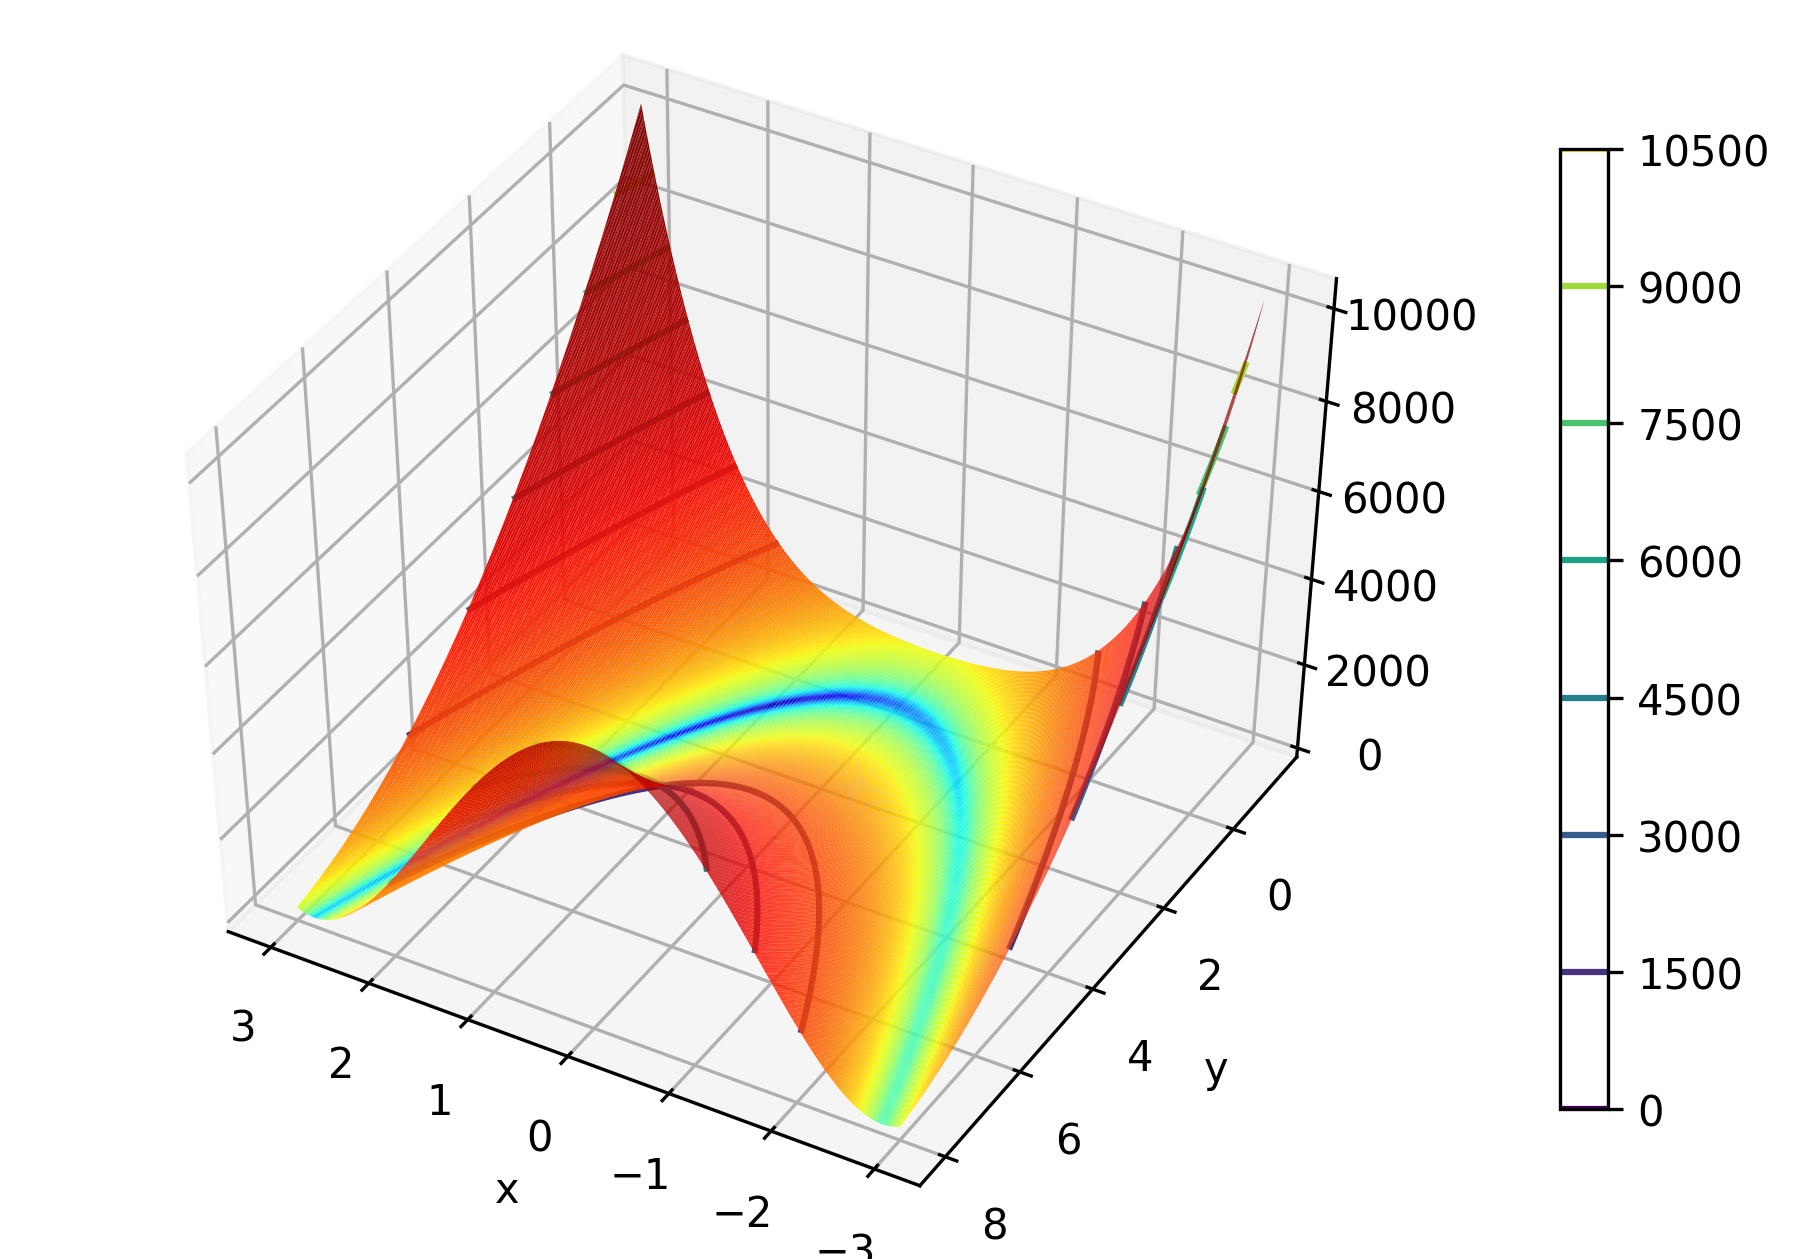

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 150

#rosenbrock plot code:
fig = plt.figure()
#ax = Axes3D(fig, azim = -128, elev = 43)
#ax = Axes3D(fig, azim = 115, elev =45) good
ax = Axes3D(fig, azim = 120, elev =45)

s = .025
X = np.arange(-3, 3.+s, s) #arange(start,finish,increment), stores resulting vector in X
Y = np.arange(-1.2, 8.+s, s)
X, Y = np.meshgrid(X, Y)   #create the mesh grid
Z = (1.-X)**2 + 100.*(Y-X*X)**2 # rosenbrock function
ax.plot_surface(X, Y, Z, rstride = 1, cstride = 1, norm = LogNorm(), cmap = cm.jet)

#add
CS = plt.contour(X,Y,Z) #plot contour

plt.clabel(CS,inline=1,fontsize=10)
CB = plt.colorbar(CS, shrink=0.8, extend='both')  #colorbar


#ax.plot(xs=X,ys=[0]*len(X),zs=Y,zdir='z')
 #Notes: 
 #rstride = row stride (step size)
 #cstride = column stride (step size)
plt.xlabel("x")
plt.ylabel("y")
 
plt.savefig("Rosenbrock function.png",dpi=400)

plt.show()

In [ ]:
from scipy.optimize import fmin
from scipy.optimize import fmin_powell
from scipy.optimize import fmin_ncg
from scipy.optimize import fmin_l_bfgs_b

In [ ]:
def rosen(x):
	return sum(100.0*(x[1:]-x[:-1]**2.0)**2.0 + (1-x[:-1])**2.0)

def r_grad(x):
        xm = x[1:-1]
        xm_m1 = x[:-2]
        xm_p1 = x[2:]
        grad = zeros(x.shape)
        grad[1:-1] = 200*(xm-xm_m1**2) - 400*(xm_p1 - xm**2)*xm - 2*(1-xm)
        grad[0] = -400*x[0]*(x[1]-x[0]**2) - 2*(1-x[0])
        grad[-1] = 200*(x[-1]-x[-2]**2)
        return grad

def r_hess(x):
        x = asarray(x)
        H = diag(-400*x[:-1],1) - diag(400*x[:-1],-1)
        diagonal = zeros(len(x))
        diagonal[0] = 1200*x[0]-400*x[1]+2
        diagonal[-1] = 200
        diagonal[1:-1] = 202 + 1200*x[1:-1]**2 - 400*x[2:]
        H = H + diag(diagonal)
        return H


In [ ]:
x0 = np.arange(-2,4)
x0[1:]

array([-1,  0,  1,  2,  3])

In [ ]:
xopt = fmin_ncg(rosen,x0,r_grad,fhess=r_hess) 

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 48
         Function evaluations: 67
         Gradient evaluations: 114
         Hessian evaluations: 48


In [ ]:
xopt

array([1.00000236, 1.00000418, 1.00000604, 1.00000258, 1.00000277,
       1.00000459])

In [ ]:
[xopt,f,d] = fmin_l_bfgs_b(rosen,x0,r_grad,m=20,factr=10) 

In [ ]:
xopt

array([1.        , 1.        , 1.        , 1.        , 1.        ,
       0.99999999])

In [ ]:
d

{'funcalls': 46,
 'grad': array([ 1.06750216e-06, -1.91149915e-06, -2.13570278e-07, -2.10460223e-08,
         7.48773039e-07, -2.63333577e-07]),
 'nit': 41,
 'task': b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL',
 'warnflag': 0}

In [ ]:
xopt = fmin_powell(rosen,x0) 

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 34
         Function evaluations: 2521


In [ ]:
xopt

array([1., 1., 1., 1., 1., 1.])

## <font color='navy'>Convolutional Neural Networks Example

In [ ]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os
from tensorflow.python.framework import ops


batch_size = 32
num_classes = 10
epochs = 200 # you can change this number depending the accuracy obtained after a certain number of epochs
data_augmentation = True
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'

# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

if not data_augmentation:
    print('Not using data augmentation.')
    model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train)

    # Fit the model on the batches generated by datagen.flow().
    model.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=4)

# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

170500096/170498071 [==============================] - 6s 0us/step
x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples
Using real-time data augmentation.
Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/200
1563/1563 [==============================] - 34s 22ms/step - loss: 1.8842 - accuracy: 0.3085 - val_loss: 1.6093 - val_accuracy: 0.4168
Epoch 2/200
1563/1563 [==============================] - 33s 21ms/step - loss: 1.5916 - accuracy: 0.4186 - val_loss: 1.3671 - val_accuracy: 0.5120
Epoch 3/200
1563/1563 [==============================] - 33s 21ms/step - loss: 1.4722 - accuracy: 0.4704 - val_loss: 1.2874 - val_accuracy: 0.5391
Epoch 4/200
1563/1563 [==============================] - 33s 21ms/step - loss: 1.3822 - accuracy: 0.5054 - val_loss: 1.1973 - val_accuracy: 0.5704
Epoch 5/200
1563/1563 [==============================] - 33s 21ms/step - loss: 1.3154 - accuracy: 0.5297 - val_loss: 1.1930 - val_accuracy: 0.5728
Epoch 6/200
15